<a href="https://colab.research.google.com/github/YashDeepp/handwritten-signature/blob/main/HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[Errno 2] No such file or directory: '/content/drive/MyDrive/Github/'
/content


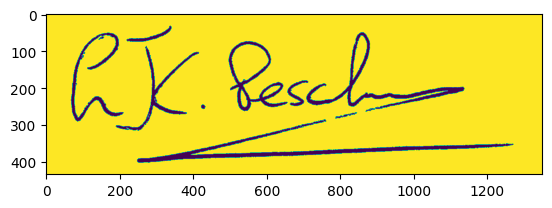

In [3]:
%cd /content/drive/MyDrive/Github/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
img = plt.imread('/content/drive/MyDrive/SIgnature/archive (1)/sample_Signature/sample_Signature/forged/NFI-00303001.png')
plt.imshow(img)

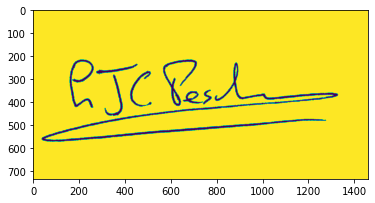

In [ ]:
img1 = plt.imread('/content/drive/MyDrive/SIgnature/archive (1)/sample_Signature/sample_Signature/genuine/NFI-00101001.png')
plt.imshow(img1)

In [ ]:
import glob
gen = [glob.glob('/content/drive/MyDrive/SIgnature/archive (1)/Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
       glob.glob('/content/drive/MyDrive/SIgnature/archive (1)/Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
       glob.glob('/content/drive/MyDrive/SIgnature/archive (1)/Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
       glob.glob('/content/drive/MyDrive/SIgnature/archive (1)/Dataset_Signature_Final/Dataset/dataset4/real1/*.*')]
                 
forg = [glob.glob('/content/drive/MyDrive/SIgnature/archive (1)/Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('/content/drive/MyDrive/SIgnature/archive (1)/Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
        glob.glob('/content/drive/MyDrive/SIgnature/archive (1)/Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('/content/drive/MyDrive/SIgnature/archive (1)/Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]

In [ ]:
import cv2
from tqdm import tqdm 
import os
import re
gen_array=[]
forge_array=[]
from tqdm import tqdm
from PIL import Image
from tensorflow.keras.utils import img_to_array
for data in range(len(forg)):
    for i in forg[data]:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            image = image.astype('float32') / 255.0
            forge_array.append(img_to_array(image))
            img1 = cv2.flip(image,1)
            forge_array.append(img_to_array(cv2.flip(image,1)))
            img2 = cv2.flip(image,-1)
            forge_array.append(img_to_array(img2))
            img3 = cv2.flip(image,-1)
            img3 = cv2.flip(img3,1)
            forge_array.append(img_to_array(img3))
            img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
            forge_array.append(img_to_array(img4))
            img5 = cv2.flip(img4,1)
            forge_array.append(img_to_array(img5))
            img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
            forge_array.append(img_to_array(img6))
            img7 = cv2.flip(img6,1)
for data in range(len(gen)):
    for i in gen[data]:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            image = image.astype('float32') / 255.0
            gen_array.append(img_to_array(image))
            img1 = cv2.flip(image,1)
            gen_array.append(img_to_array(cv2.flip(image,1)))
            img2 = cv2.flip(image,-1)
            gen_array.append(img_to_array(img2))
            img3 = cv2.flip(image,-1)
            img3 = cv2.flip(img3,1)
            gen_array.append(img_to_array(img3))
            img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
            gen_array.append(img_to_array(img4))
            img5 = cv2.flip(img4,1)
            gen_array.append(img_to_array(img5))
            img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
            gen_array.append(img_to_array(img6))
            img7 = cv2.flip(img6,1)
            gen_array.append(img_to_array(img7))
            

In [ ]:
import glob 
import cv2
train_data = []
train_labels = []
test_data = []
test_labels = []

In [ ]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
for i in gen_array:
            image = i
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
            fd, image = hog(image, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)      
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(0)
for j in forge_array:
            image = j
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            fd, image = hog(image, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)      
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(1)

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [ ]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)

test_data,test_labels = shuffle(test_data,test_labels)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(test_data, test_labels, test_size=0.33, random_state=42)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test=X_test.reshape(X_test.shape[0],-1)

Accuracy 0.8843995510662177
P,R,F1: (0.8908058260525054, 0.879747636945708, 0.8824756526249065, None)


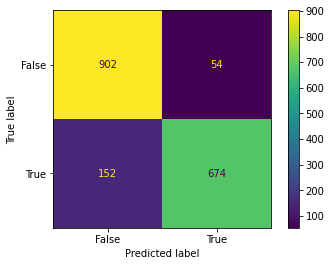

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from scipy.spatial import distance
from sklearn.metrics import precision_recall_fscore_support
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)  
classifier.fit(X_train,y_train)  
from sklearn.metrics import precision_recall_fscore_support
y_pred= classifier.predict(X_test)  
print("Accuracy", accuracy_score(y_test, y_pred))
print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [ ]:
from tabulate import tabulate
table = [['Metrics', 'Percentage'], 
         ['Accuracy', '88.43%'], 
         ['Precision', '89.08%'], 
         ['Recall', '87.97'],
         ['F1 Score','88.24']]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════╤══════════════╕
│ Metrics   │ Percentage   │
╞═══════════╪══════════════╡
│ Accuracy  │ 88.43%       │
├───────────┼──────────────┤
│ Precision │ 89.08%       │
├───────────┼──────────────┤
│ Recall    │ 87.97        │
├───────────┼──────────────┤
│ F1 Score  │ 88.24        │
╘═══════════╧══════════════╛


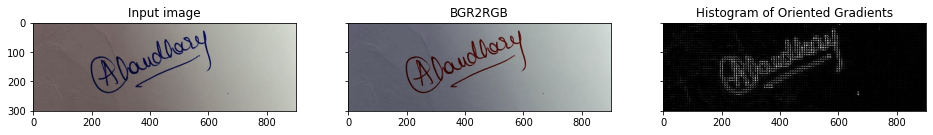

In [ ]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(16, 8), sharex=True, sharey=True) 
image=imread('/content/drive/MyDrive/PHOTO-2023-03-18-20-40-23.jpg')
ax1.imshow(image, cmap=plt.cm.gray) 
ax1.set_title('Input image') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
ax2.imshow(image, cmap=plt.cm.gray) 
ax2.set_title('BGR2RGB')
fd, image = hog(image, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)
image = exposure.rescale_intensity(image, in_range=(0, 10)) 
ax3.imshow(image, cmap=plt.cm.gray) 
ax3.set_title('Histogram of Oriented Gradients')
plt.show()